In [4]:
%matplotlib notebook

import numpy

import matplotlib.pyplot as pyplot
import seaborn as sns
sns.set(color_codes=True)

In [34]:
distance_atomic_units = 5.291772109e-11 # in meters
print(distance_atomic_units)

max_N_basis = 5000 #max number of plane wave basis functions in each dimension
print(max_N_basis)

omega = 1 # force constant for harmonic potential
print(omega)

5.291772109e-11
5000
1


In [2]:
lattice_constant = 100e-10 / distance_atomic_units  #100 Å converted to atomic units
print("lattice_constant:  {}".format(lattice_constant))
print("H-atom radius in atomic units:  ", 1.2e-10 / distance_atomic_units)

lattice_constant:  188.97261246364832
H-atom radius in atomic units:   2.2676713495637797


In [5]:
unit_cell_volume = numpy.power(lattice_constant, 3.)
print(unit_cell_volume)
print(1./unit_cell_volume)

6748334.494715145
1.481847114696426e-07


In [12]:
potential_energy_depth = 0.5 * omega * numpy.power(lattice_constant/2., 2.0)
print(potential_energy_depth)

4463.831032667026


<IPython.core.display.Javascript object>


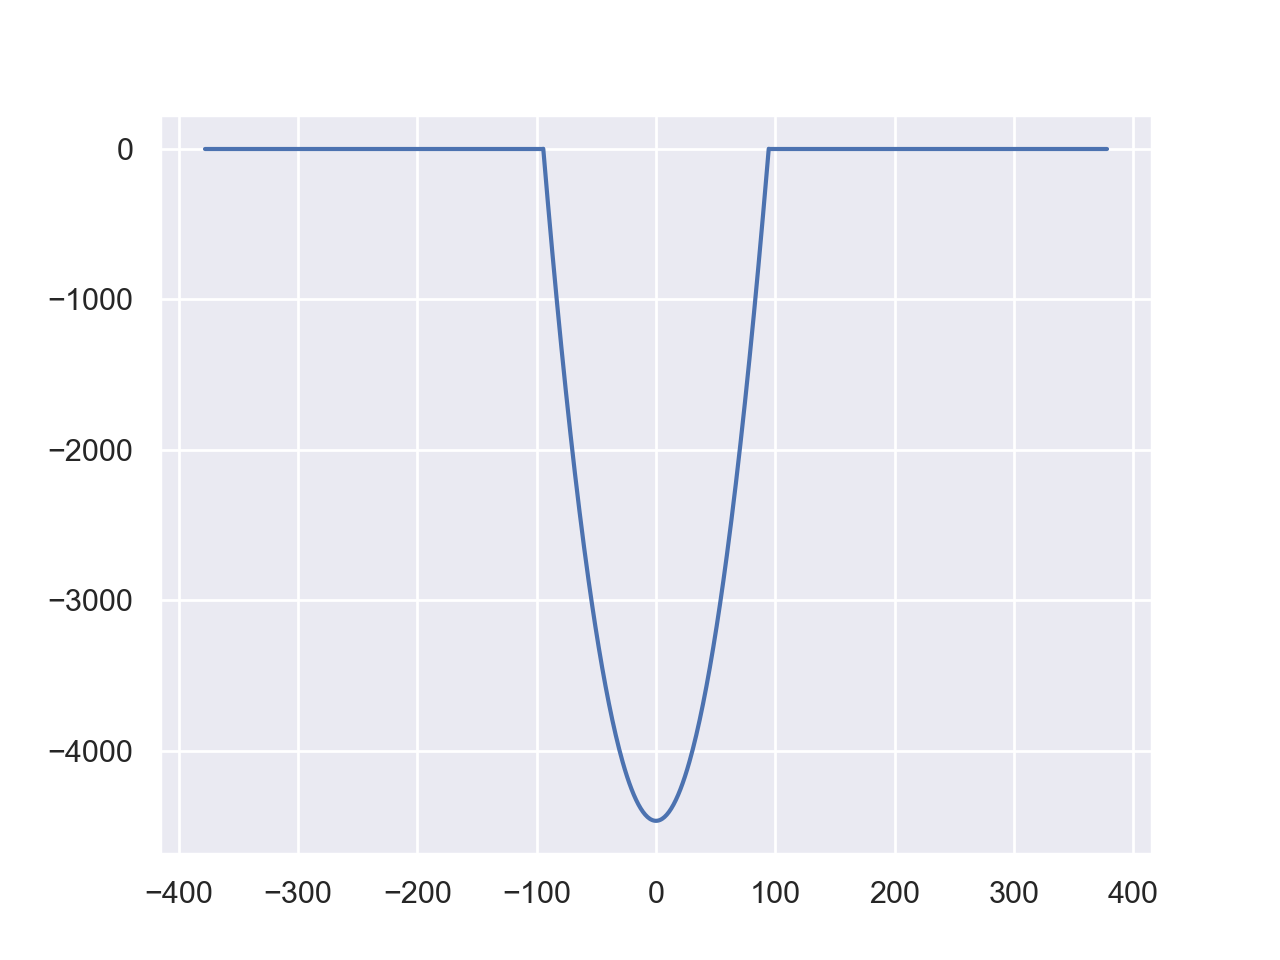

In [15]:
x = numpy.linspace(-lattice_constant/2., lattice_constant/2., num=200)
U = (0.5 * omega * numpy.power(x, 2.0)) - potential_energy_depth
pyplot.figure("potential energy diagram")
pyplot.plot(x,U, 'b')
pyplot.plot((-2*lattice_constant, -lattice_constant/2.), (0,0), 'b')
pyplot.plot((lattice_constant/2., 2*lattice_constant), (0,0), 'b')

The potential energy to be used - harmonic oscillator within unit cell, flat & 0 elsewhere

$U(x<-\frac{L}{2}) = 0$

$U(x>\frac{L}{2}) = 0$

$U(-\frac{L}{2} \le x \le \frac{L}{2}) = \frac{1}{2}\omega x^2 - C$

Solve for C such that the potential energy is continuous

$U(x=\frac{L}{2}) = 0 = \frac{1}{2}\omega (\frac{L}{2})^2 - C$

$C = \frac{1}{2}\omega (\frac{L}{2})^2$

$= \frac{1}{2}\omega \frac{L^2}{4}$

$C = \frac{1}{8}\omega L^2$

Thereofe U is:

$U(-\frac{L}{2} \le x \le \frac{L}{2}) = \frac{1}{2}\omega x^2 - \frac{1}{8}\omega L^2$

$= \frac{1}{2}\omega (x^2 - \frac{1}{4} L^2)$

----------
probably unneccessary but could also write this as

$= \frac{1}{2}\omega (x - \frac{1}{2}L)(x + \frac{1}{2}L)$

solve for potential energy elements

$$U(k_1,k_2) = \int_{-\inf}^{\inf}{dx\ \phi_{k_1}^*(x)\ U(x)\ \phi_{k_2}(x)}$$

$$= \int_{-\inf}^{\inf}{dx\ \frac{1}{\sqrt{L}}\ e^{ik_1x}\ U(x)\ \frac{1}{\sqrt{L}}\ e^{-ik_2x}}$$

$$= \frac{1}{L}\int_{-\inf}^{\inf}{dx\ U(x)\ e^{ix(k_1-k_2)}}$$

$$U(k) = \frac{1}{L}\int_{-\inf}^{\inf}{dx\ U(x)\ e^{ixk}}$$

$$k=k_1 - k_2$$

-------------
sub in for $U(x)$

$$U(k)= \frac{1}{L}\int_{-\inf}^{-L/2}{dx\ 0\ e^{ikx}} + \frac{1}{L}\int_{-L/2}^{L/2}{dx\ \frac{1}{2}\omega (x^2 - \frac{1}{4} L^2)\ e^{ikx}} + \frac{1}{L}\int_{L/2}^{\inf}{dx\ 0\ e^{ikx}}$$

$$= 0+ \frac{1}{L}\int_{-L/2}^{L/2}{dx\ \frac{1}{2}\omega (x^2 - \frac{1}{4} L^2)\ e^{ikx}}\ +0$$

$$= \frac{\omega}{2L}\Big( \int_{-L/2}^{L/2}{dx\ x^2\ e^{ikx}} - \int_{-L/2}^{L/2}{dx\ L^2\ e^{ikx}} \Big)$$

$$= \frac{\omega}{2L}\Big(lhi - rhi \Big) $$

-------------
case $k=0$:

$$U(k=0) = \frac{\omega}{2L}\Big( \int_{-L/2}^{L/2}{dx\ x^2\ e^{i0x}} - \int_{-L/2}^{L/2}{dx\ L^2\ e^{i0x}} \Big)$$

$$= \frac{\omega}{2L}\Big( \int_{-L/2}^{L/2}{dx\ x^2} - \int_{-L/2}^{L/2}{dx\ L^2} \Big)$$

$$= \frac{\omega}{2L}\Big( \Big[\frac{1}{3}x^3 \Big]_{-L/2}^{L/2} - L^2\Big[x \Big]_{-L/2}^{L/2} \Big)$$

$$= \frac{\omega}{2L}\Big( \frac{1}{3}\Big[(\frac{L}{2})^3 - (-\frac{L}{2})^3 \Big] - L^2\Big[\frac{L}{2} - (-\frac{L}{2} \Big] \Big)$$

$$= \frac{\omega}{2L}\Big( \frac{1}{3}\Big[\frac{L^3}{8} + \frac{L^3}{8} \Big] - L^2\Big[L\Big] \Big)$$

$$= \frac{\omega}{2L}\Big( \frac{L^3}{12} - L^3 \Big)$$

$$= \frac{\omega}{2L}\Big( - \frac{11\ L^3}{12} \Big)$$

$$= -\frac{11\omega L^2}{24}$$

-------------
case $k\ne0$ start with right hand integral ($rhi$)

$$rhi= \int_{-L/2}^{L/2}{dx\ L^2\ e^{ikx}}$$

$$= L^2 \Big[ \frac{1}{ik} e^{ikx} \Big]_{-L/2}^{L/2}$$

$$= \frac{L^2}{ik} \Big[ e^{ikL/2} - e^{-ikL/2} \Big]$$

by definition of the basis set $e^{ikL/2} = e^{-ikL/2}$ therefore

$$rhi = 0$$

-------------
case $k\ne0$, left hand integral ($lhi$)

$$lhi= \int_{-L/2}^{L/2}{dx\ x^2\ e^{ikx}}$$

integration by parts

$$u=x^2\ \ \ \ \ \ \ dv=e^{ikx}dx$$

$$du=2x\ dx\ \ \ \ \ \ \ v=\frac{1}{ik}e^{ikx}$$

$$lhi= \Big[uv - \int{v\ du} \Big]_{-L/2}^{L/2}$$

$$= \Big[x^2\frac{1}{ik}e^{ikx} - \int{\frac{1}{ik}e^{ikx}\ 2x\ dx} \Big]_{-L/2}^{L/2}$$

integration by parts again

$$u'=x\ \ \ \ \ \ \ dv'=e^{ikx}dx$$

$$du'=dx\ \ \ \ \ \ \ v'=\frac{1}{ik}e^{ikx}$$

$$lhi= \frac{1}{ik} \Big[x^2 e^{ikx} - 2\Big(u'v' - \int{v'du'}\Big)\Big]_{-L/2}^{L/2}$$

$$= \frac{1}{ik} \Big[x^2 e^{ikx} - 2\Big(x\frac{1}{ik}e^{ikx} - \int{\frac{1}{ik}e^{ikx}\ dx}\Big)\Big]_{-L/2}^{L/2}$$

$$= \frac{1}{ik} \Big[x^2 e^{ikx} - 2x\frac{1}{ik}e^{ikx} +2 \int{\frac{1}{ik}e^{ikx}\ dx}\Big]_{-L/2}^{L/2}$$

investigate the 3 terms in the above individually.  

$$lhi= \frac{1}{ik} \Big[first - \frac{2}{ik}middle +2\ last\Big]_{-L/2}^{L/2}$$

First term ($first$):

$$first= \Big[x^2 e^{ikx}\Big]_{-L/2}^{L/2}$$

$$=\Big[\frac{L^2}{4}e^{ikL/2} - \frac{L^2}{4}e^{-ikL/2}\Big]$$

by definition of the basis set $e^{ikL/2} = e^{-ikL/2}$ therefore:
$$first=0$$

last term ($last$):

$$last= \int_{-L/2}^{L/2}{\frac{1}{ik}e^{ikx}\ dx}$$

$$= \frac{1}{ik}\Big[\frac{1}{ik}e^{ikx}\Big]_{-L/2}^{L/2}$$

$$= -\frac{1}{k^2}\Big[ e^{ikL/2} - e^{-ikL/2} \Big]$$

$$last = 0$$

(as before by definition of the basis set these are equal)

middle term ($middle$):

$$middle= \Big[x e^{ikx}\Big]_{-L/2}^{L/2}$$

$$= \Big[\frac{L}{2}e^{ikL/2} - \frac{-L}{2}e^{-ikL/2}\Big]$$

$$= \Big[\frac{L}{2}e^{ikL/2} + \frac{L}{2}e^{-ikL/2}\Big]$$

$$middle= L\ e^{ikL/2}$$

substitute the $left$, $middle$, and $right$ back into the equation for $lhi$:

$$lhi= \frac{1}{ik} \Big[0 - \frac{2}{ik}L\ e^{ikL/2} +2*0\Big]$$

$$= -\frac{2L}{i^2k^2} e^{ikL/2}$$

$$lhi= -\frac{2L}{k^2} e^{ikL/2}$$

definition of k (from boundary condition):  $k=\frac{2\pi n}{L}$

$$lhi= -\frac{2L}{k^2} e^{i(L/2)2\pi n / L}$$

$$= -\frac{2L}{(\frac{2\pi n}{L})^2} e^{i\pi n}$$

$$lhi= -\frac{L^3}{2\pi^2n^2} (-1)^n$$

-----------
solve for U(k) now

$$U(k)= \frac{\omega}{2L}\Big(lhi - rhi \Big) $$

$$= \frac{\omega}{2L}\Big(-\frac{L^3}{2\pi^2n^2} (-1)^n - 0\Big) $$

$$= -\frac{\omega L^2}{4\pi^2n^2} (-1)^n $$

In [ ]:
""" 
for each reciprical lattice dimension
k = 2 pi m / lattice_constant
where m is an integer >= 0

kinetic energy of the waves is (atomic units):
KE = k^2 / 2

max k in single dimension:
2 pi max_N_basis_each_dim / lattice_constant

KE of above:
((2 pi max_N_basis_each_dim) / lattice_constant)^2 / 2

""" 

# # maximum k in single dimension
# max_k = 2 * numpy.pi * max_N_basis_each_dim / lattice_constant
# print("max_k:  {}".format(max_k))

# max_KE = max_k * max_k / 2.
# print("max_KE:  {}".format(max_KE))

In [35]:
# basis_k_indexes = []
# for i in range(max_N_basis_each_dim):
#     for j in range(max_N_basis_each_dim):
#         for k in range(max_N_basis_each_dim):
#             if i != 0 or j !=0 or k != 0:
#                 t = numpy.sqrt(i*i + j*j + k*k)
#                 if t <= max_N_basis_each_dim:
#                     basis_k_indexes.append((i,j,k))

# # for j in range(3):
# #     for i in range(1,max_N_basis_each_dim+1):
# #         cur_vect = numpy.zeros(3)
# #         cur_vect[j] = i
# #         basis_k_indexes.append(cur_vect)

# print(len(basis_k_indexes))
# print(basis_k_indexes[:10])
# basis_k_indexes = numpy.array(basis_k_indexes)
# print(basis_k_indexes.shape)
# print(basis_k_indexes[:10,:])

basis_k_indexes = numpy.array(range(1,max_N_basis+1))
print(basis_k_indexes.shape)
print(basis_k_indexes[:10])

(5000,)
[ 1  2  3  4  5  6  7  8  9 10]


In [36]:
N_basis = basis_k_indexes.shape[0]
print(N_basis)

5000


In [37]:
# basis_k_indexes_norm_sq = numpy.sum(numpy.power(basis_k_indexes, 2), axis=1)
basis_k_indexes_norm_sq = numpy.power(basis_k_indexes, 2)
print(basis_k_indexes_norm_sq.shape)
print(basis_k_indexes_norm_sq[:10])

k_coef = 2. * numpy.pi / lattice_constant
print("k_coef", k_coef)

basis_k_norm_sq = basis_k_indexes_norm_sq * numpy.power(k_coef, 2.0)
print(basis_k_norm_sq.shape)
print(basis_k_norm_sq[:10])

(5000,)
[  1   4   9  16  25  36  49  64  81 100]
k_coef 0.033249184764211535
(5000,)
[0.00110551 0.00442203 0.00994957 0.01768813 0.02763771 0.0397983
 0.05416991 0.07075253 0.08954617 0.11055083]


In [38]:
basis_KE = 0.5 * basis_k_norm_sq
print(basis_KE[:10])

[0.00055275 0.00221102 0.00497479 0.00884407 0.01381885 0.01989915
 0.02708495 0.03537627 0.04477309 0.05527541]


In [39]:
H_mat = numpy.zeros((N_basis, N_basis))
# H_mat = numpy.memmap("h_mat.bin", dtype=numpy.float32, mode="w+", shape=(N_basis, N_basis))
H_mat[:] = numpy.nan
print(H_mat.shape)
print(H_mat[:4,:4])

(5000, 5000)
[[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]


In [49]:
N = N_basis

# pe_coef = unit_cell_volume * numpy.power(k_coef, 2.0)
pe_coef = -omega * numpy.power(lattice_constant / numpy.pi, 2.0) / 4.
print("pe_coef", pe_coef)

for i in range(N):
    b1 = basis_k_indexes[i]

    b = basis_k_indexes[(i+1):] - b1
# #     print(b.shape)
# #     print(b)

    b_norm_sq = b * b
# #     print(b_norm_sq.shape)

#     cur_pe = pe_coef * numpy.power(-1, b) / b_norm_sq
    cur_pe = pe_coef / b_norm_sq
    
    H_mat[i, (i+1):] = cur_pe
    
# #     for j in range(i+1, N):
# #         b2 = basis_k_indexes[j, :]
        
# #         b = b1 - b2
# #         b_norm_sq = numpy.sum(b * b)

# #         cur_pe = -1. / (b_norm_sq * pe_coef)
# # #         print(i,j, b1, b2, b, b_norm_sq, cur_pe)

# #         H_mat[i, j] = cur_pe
    
#     if i%1000 == 0:
#         print(i)

print(H_mat[:4, :4])

pe_coef -904.5612876184442
[[ 5.52754144e-04 -9.04561288e+02 -2.26140322e+02 -1.00506810e+02]
 [            nan  2.21101657e-03 -9.04561288e+02 -2.26140322e+02]
 [            nan             nan  4.97478729e-03 -9.04561288e+02]
 [            nan             nan             nan  8.84406630e-03]]


In [41]:
print(numpy.sum(numpy.isinf(H_mat)))

0


In [50]:
u = numpy.diag_indices(N_basis)
h_diag = basis_KE #- (0.5 * lattice_constant * lattice_constant)
H_mat[u] = h_diag
print(H_mat[:4, :4])

[[ 5.52754144e-04 -9.04561288e+02 -2.26140322e+02 -1.00506810e+02]
 [            nan  2.21101657e-03 -9.04561288e+02 -2.26140322e+02]
 [            nan             nan  4.97478729e-03 -9.04561288e+02]
 [            nan             nan             nan  8.84406630e-03]]


In [51]:
# eigvals = numpy.memmap("eigvals.bin", dtype=numpy.float32, mode="w+", shape=H_mat.shape[0])
# eigmat = numpy.memmap("eigmat.bin", dtype=numpy.float32, mode="w+", shape=H_mat.shape)

# eigvals[:], eigmat[:] = numpy.linalg.eigh(H_mat, UPLO="U")
eigvals, eigmat = numpy.linalg.eigh(H_mat, UPLO="U")
print(eigvals[:10])
print(eigmat[:4, :4])

[-2943.36924252 -2911.84047888 -2888.17732577 -2866.9734551
 -2847.95088834 -2830.11522325 -2813.449253   -2797.53255133
 -2782.38251681 -2767.76691961]
[[0.0076471  0.00903344 0.00984205 0.01045014]
 [0.01122736 0.01338302 0.01465131 0.01562645]
 [0.01399002 0.01679969 0.01845701 0.01975038]
 [0.01634993 0.01975811 0.02176598 0.0233494 ]]


<IPython.core.display.Javascript object>


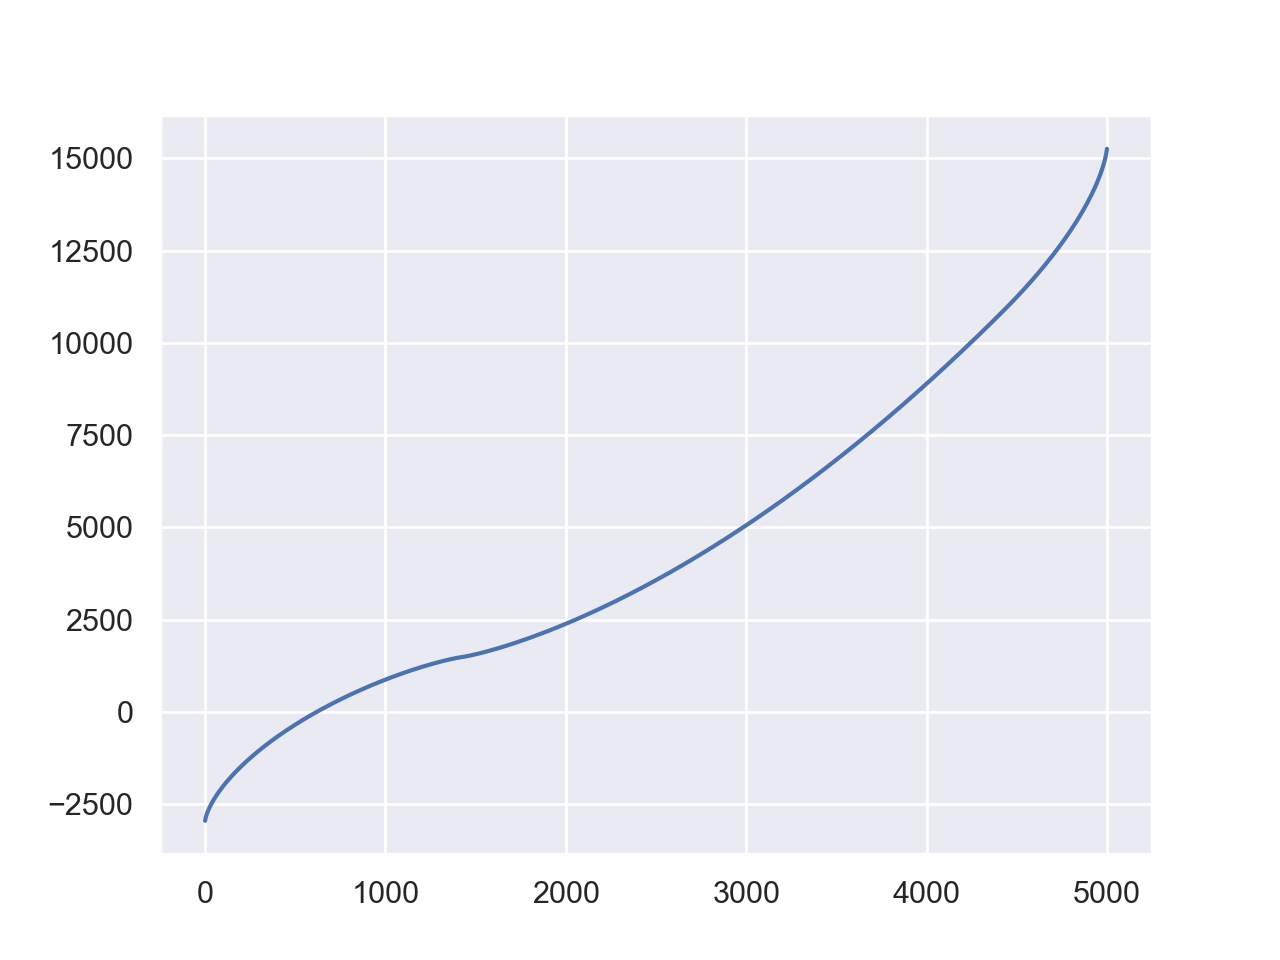

In [44]:
title = """eigenvalues 1"""
pyplot.figure(title)
pyplot.plot(eigvals)

dx:   1.9088142673095803
shapes:   (100,) (100,)
(3.144472973752398e-05+0j) (6.002214875467961e-05+0j)


<IPython.core.display.Javascript object>


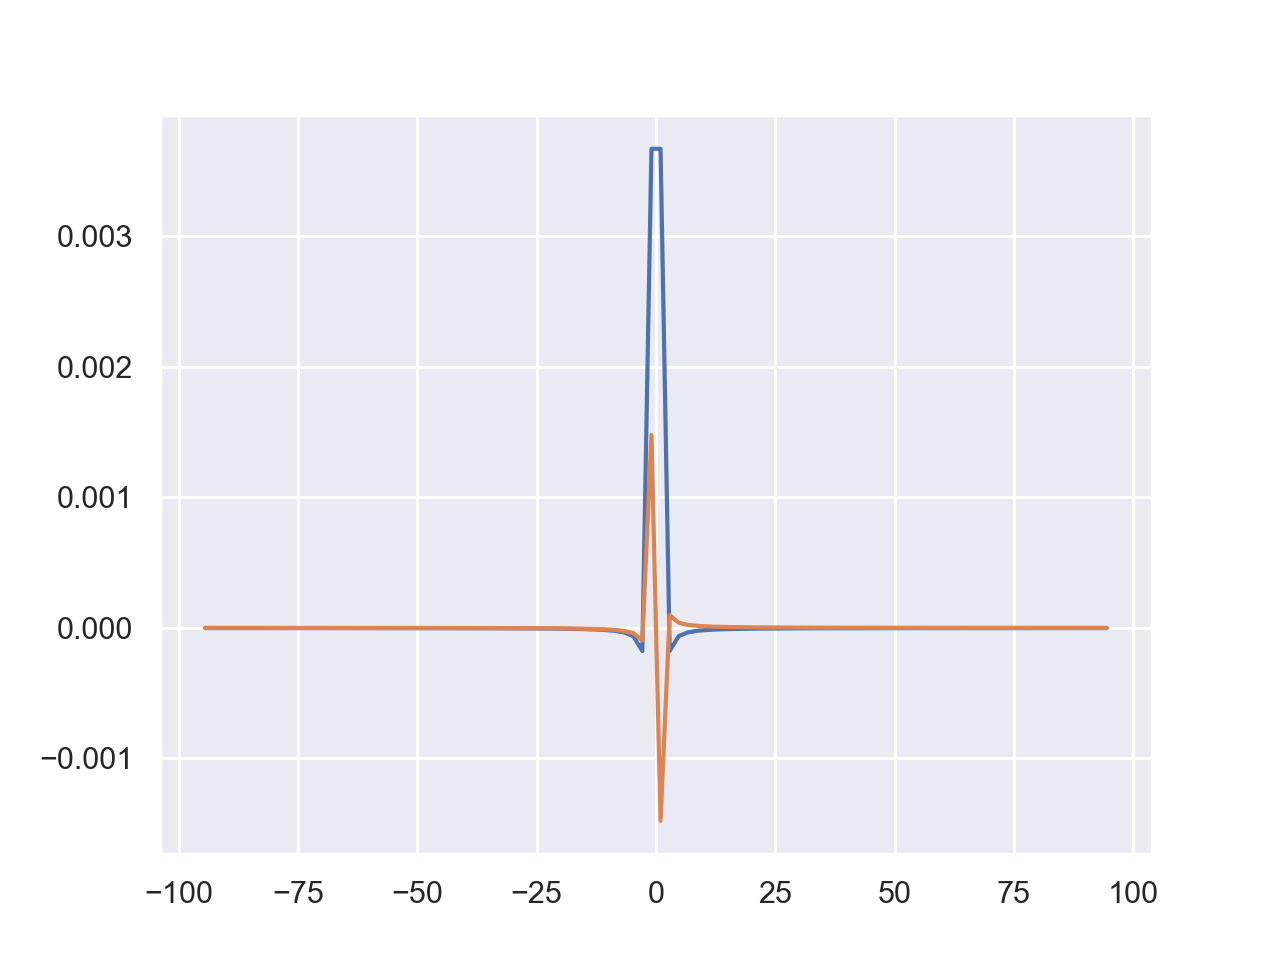

<IPython.core.display.Javascript object>


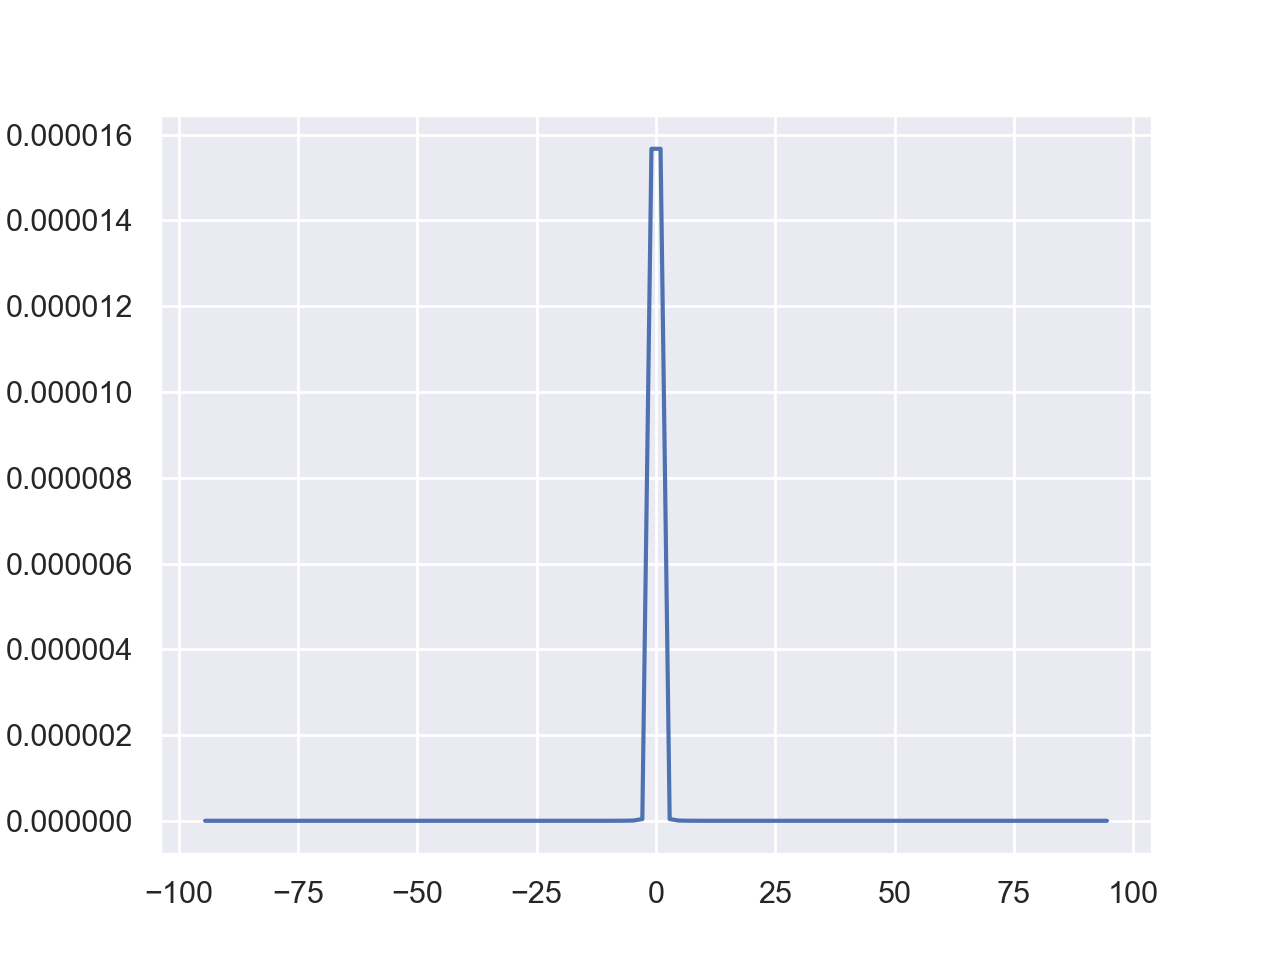

In [58]:
N = N_basis

# basis_dim = 2
cur_eig_vect = eigmat[:,4]

x = numpy.linspace(-lattice_constant/2., lattice_constant/2., num=100)
dx = x[1] - x[0]
print("dx:  ", dx)

# x = numpy.linspace(0., lattice_constant, num=100)
y = numpy.zeros(x.shape[0])
print("shapes:  ", x.shape, y.shape)

for i in range(N):
    cur_basis = basis_k_indexes[i]
#     print(cur_basis)
    cur_k = cur_basis * 2 * numpy.pi / lattice_constant
#     print(cur_k)
    cur_basis_r = numpy.exp(1j * cur_k * x)
#     print(cur_basis_r[:10])
    
    y = y + cur_eig_vect[i] * cur_basis_r

y = y*numpy.power(lattice_constant, -1.5)
prob_dens = numpy.conj(y)*y
t = numpy.sum(prob_dens)
print(t, t*dx)


title = """wavefun 1"""
pyplot.figure(title)
pyplot.plot(x,numpy.real(y))
pyplot.plot(x,numpy.imag(y))
title = """prob dens 1"""
pyplot.figure(title)
pyplot.plot(x,prob_dens)

<IPython.core.display.Javascript object>


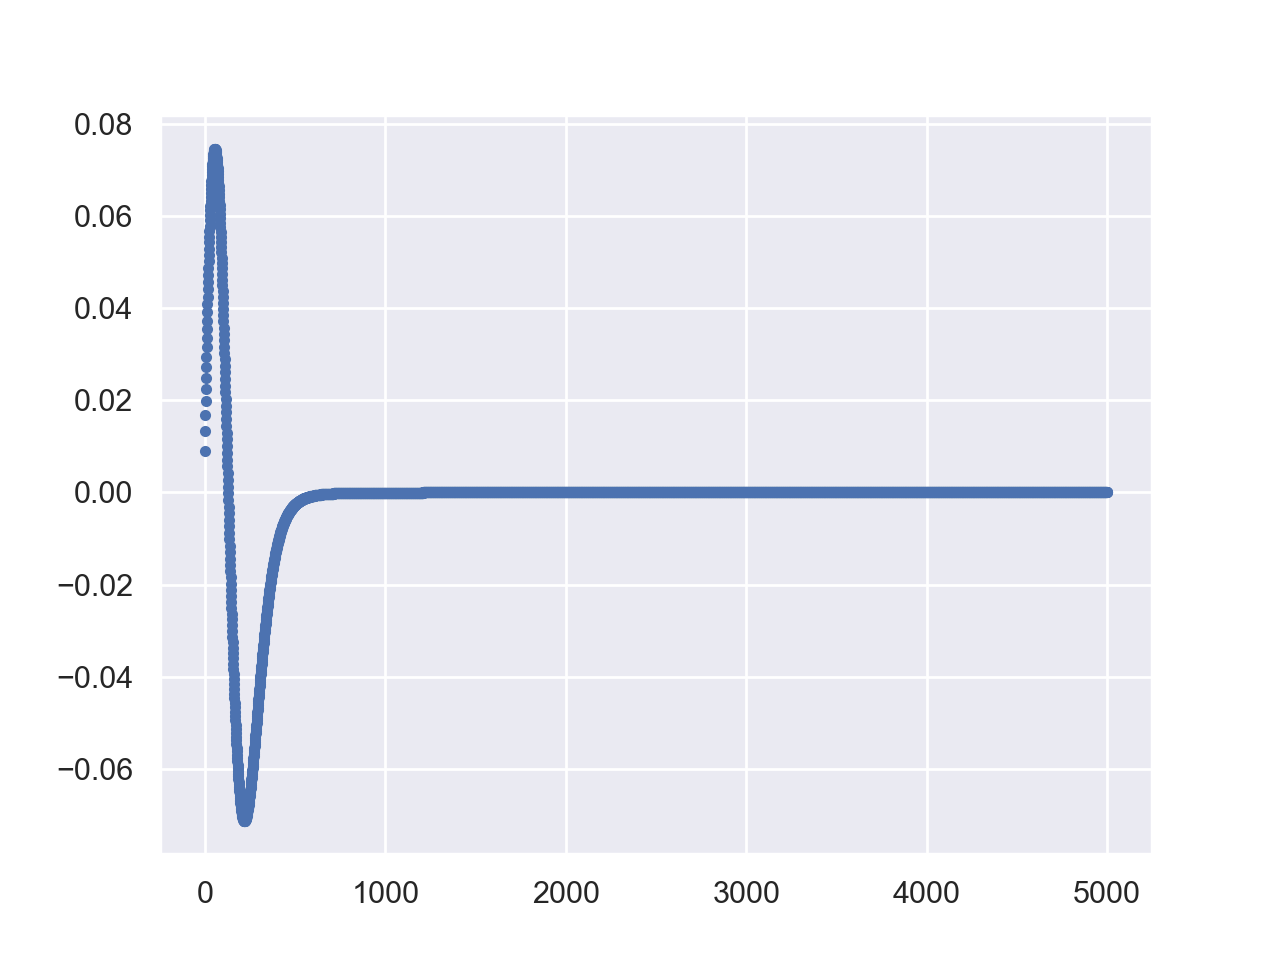

<IPython.core.display.Javascript object>


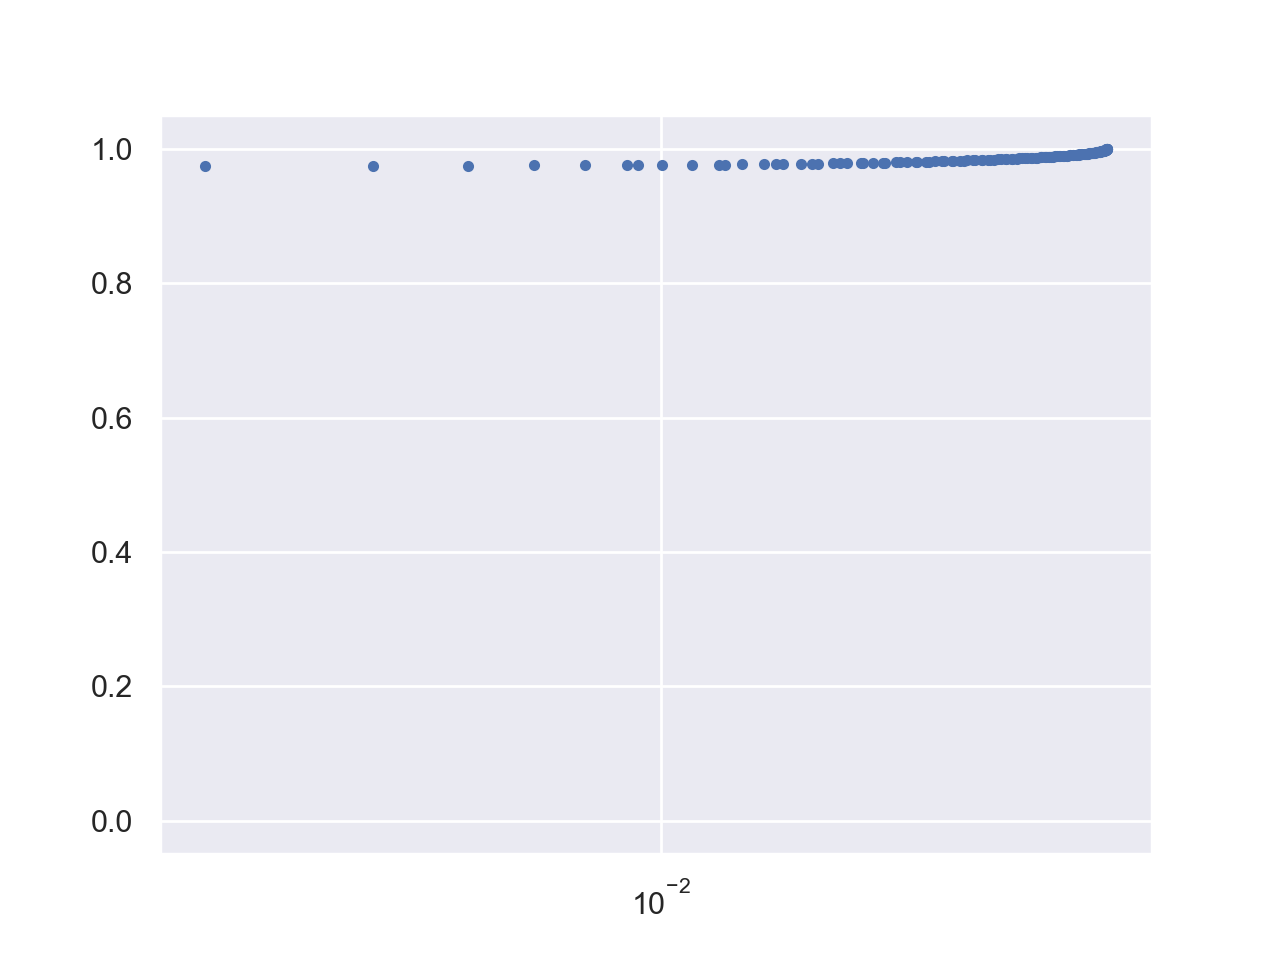

In [55]:
pyplot.figure(-4)
pyplot.plot(cur_eig_vect,'.')

t = sorted(cur_eig_vect)
f = numpy.linspace(0., 1., num=len(t))

pyplot.figure(4)
pyplot.semilogx(t, f, '.')

In [ ]:
cur_eig_vect

In [ ]:
1.2e-10 / distance_atomic_units